In [4]:
import random, os, sys
from datetime import datetime
import pandas as pd
import csv
import time
import json
from sklearn.preprocessing import StandardScaler
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Import Dataset


In [5]:
from google.colab import files
uploaded = files.upload()

Saving enrollments.csv to enrollments (3).csv


Intial view of Data set

In [6]:
import io
df = pd.read_csv(io.StringIO(uploaded['enrollments.csv'].decode('utf-8')))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
df.head()

,country,countrycode,region,incomegroup,iau_id,iau_id1,eng_name,orig_name,foundedyr,yrclosed,...,divisions,total_fields,unique_fields,specialized,merger,noiau,year,students5_interpolated,students5_extrapolated,students5_estimated
0,afghanistan,AFG,South Asia,Low income,IAU-000810,IAU-000810-1,Alberoni University,Alberoni University,1998.0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,2000.0,NaN,1546.0,1546.0
1,afghanistan,AFG,South Asia,Low income,IAU-000810,IAU-000810-1,Alberoni University,Alberoni University,1998.0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,2005.0,NaN,2106.0,2106.0
2,afghanistan,AFG,South Asia,Low income,IAU-000810,IAU-000810-1,Alberoni University,Alberoni University,1998.0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,2010.0,2317.0,2317.0,2317.0
3,afghanistan,AFG,South Asia,Low income,IAU-000810,IAU-000810-1,Alberoni University,Alberoni University,1998.0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,2015.0,1835.0,1835.0,1835.0
4,afghanistan,AFG,South Asia,Low income,IAU-000810,IAU-000810-1,Alberoni University,Alberoni University,1998.0,NaN,...,9.0,22.0,21.0,0.0,0.0,0.0,2020.0,NaN,1901.0,1901.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161560 entries, 0 to 161559
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   country                 161560 non-null  object 
 1   countrycode             159698 non-null  object 
 2   region                  159698 non-null  object 
 3   incomegroup             159691 non-null  object 
 4   iau_id                  161553 non-null  object 
 5   iau_id1                 161553 non-null  object 
 6   eng_name                161553 non-null  object 
 7   orig_name               138474 non-null  object 
 8   foundedyr               161553 non-null  float64
 9   yrclosed                460 non-null     float64
 10  private01               161553 non-null  float64
 11  coordinates             138352 non-null  object 
 12  latitude                138352 non-null  object 
 13  longitude               138352 non-null  object 
 14  phd_granting        

Q) What are the data types?


We can see from the above cells that our dataset has 16 numeric variables(float 64) and 11 categorical variable(Object)

Q) Checking for missing values

In [9]:
df.isnull().sum()

country                        0
countrycode                 1862
region                      1862
incomegroup                 1869
iau_id                         7
iau_id1                        7
eng_name                       7
orig_name                  23086
foundedyr                      7
yrclosed                  161100
private01                      7
coordinates                23208
latitude                   23208
longitude                  23208
phd_granting                   7
m_granting                140352
b_granting                140352
divisions                 140352
total_fields              140352
unique_fields             140352
specialized                    7
merger                         7
noiau                          7
year                           7
students5_interpolated    107600
students5_extrapolated     55962
students5_estimated        18729
dtype: int64

Q. Are there missing values?

no missing values are present.

What are the likely distributions of the numeric variables?

In [10]:
df.columns

Index(['country', 'countrycode', 'region', 'incomegroup', 'iau_id', 'iau_id1',
       'eng_name', 'orig_name', 'foundedyr', 'yrclosed', 'private01',
       'coordinates', 'latitude', 'longitude', 'phd_granting', 'm_granting',
       'b_granting', 'divisions', 'total_fields', 'unique_fields',
       'specialized', 'merger', 'noiau', 'year', 'students5_interpolated',
       'students5_extrapolated', 'students5_estimated'],
      dtype='object')

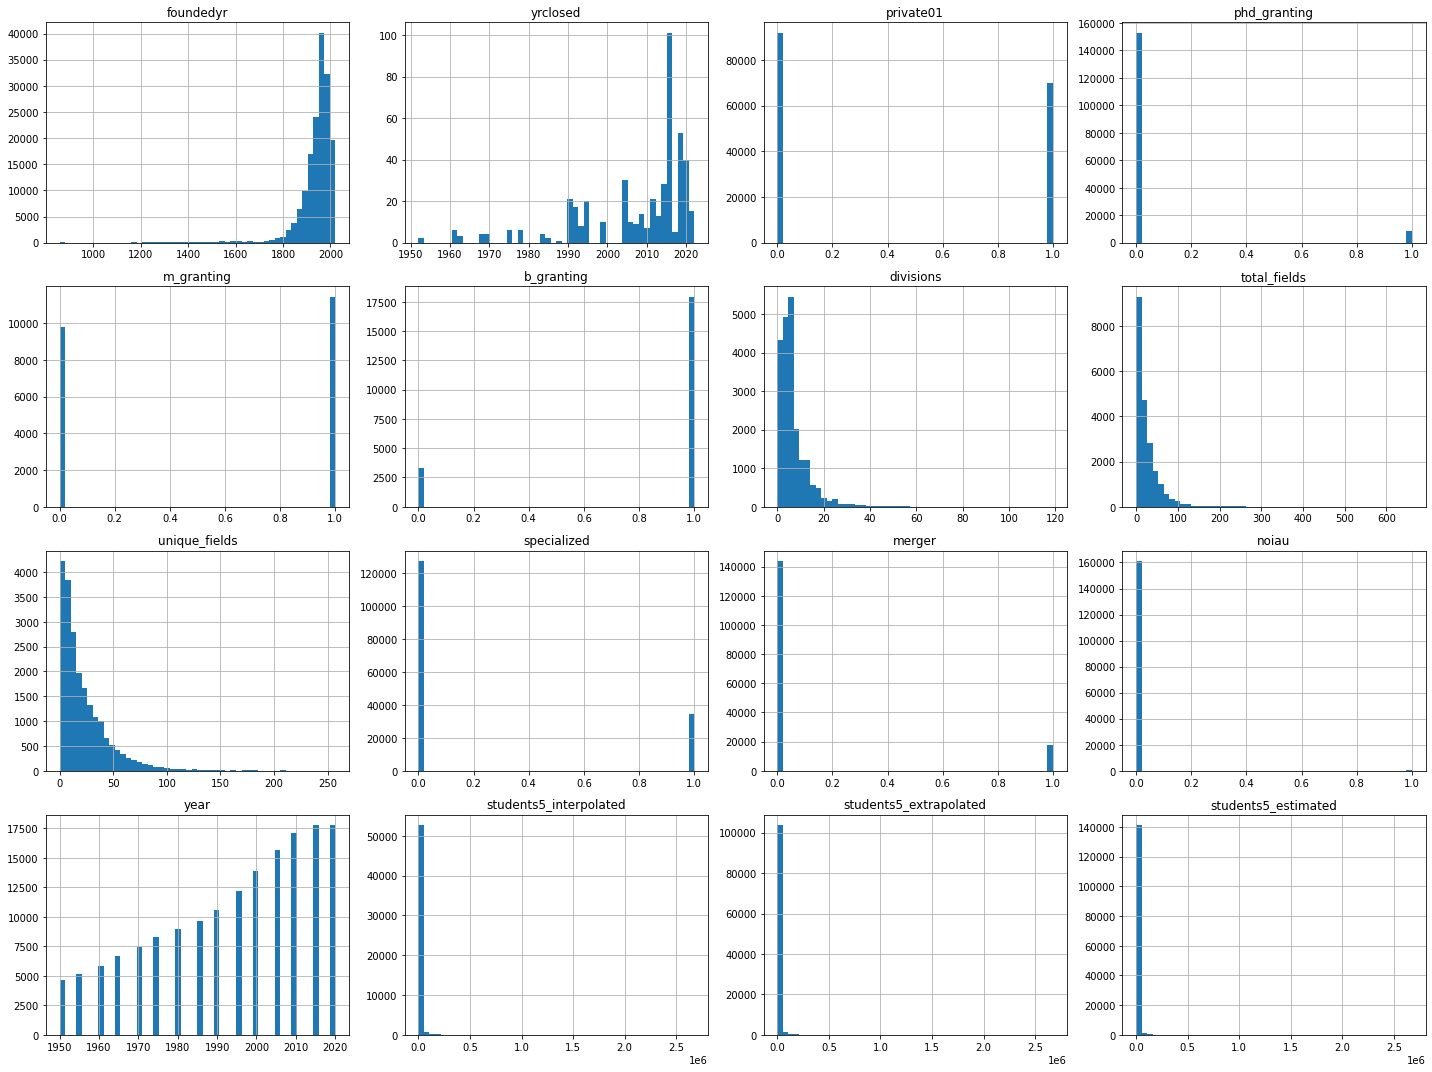

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()


Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)



Firstly, we will check the correlation between the predictor and the target variable.

In [12]:
corr_data = df.corr()
corr_y = corr_data["students5_estimated"]
corr_y.sort_values(ascending = False)

students5_interpolated    1.000000
students5_extrapolated    1.000000
students5_estimated       1.000000
unique_fields             0.236683
total_fields              0.213980
divisions                 0.199633
year                      0.099314
phd_granting              0.086618
noiau                     0.070707
m_granting                0.051991
merger                    0.028469
b_granting                0.027530
foundedyr                -0.061777
specialized              -0.081042
yrclosed                 -0.096330
private01                -0.117729
Name: students5_estimated, dtype: float64

From the above correlation data we can come to the conclusion that above highest can be considered to be as features to predict a target varaiable.

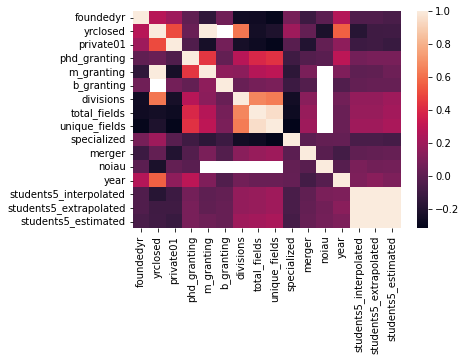

In [13]:
sns.heatmap(df.corr())

Method 2 Using Linearity

In [14]:
X = df.iloc[:,2:-1]

y = df.iloc[:,-1]

In [15]:
df['latitude']

0          35.1270053
1          35.1270053
2          35.1270053
3          35.1270053
4          35.1270053
             ...     
161555    -17.6887391
161556    -17.6887391
161557    -17.6887391
161558    -17.3152904
161559    -17.3152904
Name: latitude, Length: 161560, dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161560 entries, 0 to 161559
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   country                 161560 non-null  object 
 1   countrycode             159698 non-null  object 
 2   region                  159698 non-null  object 
 3   incomegroup             159691 non-null  object 
 4   iau_id                  161553 non-null  object 
 5   iau_id1                 161553 non-null  object 
 6   eng_name                161553 non-null  object 
 7   orig_name               138474 non-null  object 
 8   foundedyr               161553 non-null  float64
 9   yrclosed                460 non-null     float64
 10  private01               161553 non-null  float64
 11  coordinates             138352 non-null  object 
 12  latitude                138352 non-null  object 
 13  longitude               138352 non-null  object 
 14  phd_granting        

In [17]:
df1=df

In [18]:
df1=df.drop(["country","countrycode","region","incomegroup","iau_id","eng_name","orig_name","coordinates","latitude","longitude"],axis=1)

In [19]:
df1=df1.fillna(df1.mean())

<ipython-input-19-d40f0279c773>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1=df1.fillna(df1.mean())


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161560 entries, 0 to 161559
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   iau_id1                 161553 non-null  object 
 1   foundedyr               161560 non-null  float64
 2   yrclosed                161560 non-null  float64
 3   private01               161560 non-null  float64
 4   phd_granting            161560 non-null  float64
 5   m_granting              161560 non-null  float64
 6   b_granting              161560 non-null  float64
 7   divisions               161560 non-null  float64
 8   total_fields            161560 non-null  float64
 9   unique_fields           161560 non-null  float64
 10  specialized             161560 non-null  float64
 11  merger                  161560 non-null  float64
 12  noiau                   161560 non-null  float64
 13  year                    161560 non-null  float64
 14  students5_interpolat

In [21]:
X = df1.iloc[:,1:-1]

y = df1.iloc[:,-1]

In [22]:
X

,foundedyr,yrclosed,private01,phd_granting,m_granting,b_granting,divisions,total_fields,unique_fields,specialized,merger,noiau,year,students5_interpolated,students5_extrapolated
0,1998.0,2007.595652,0.0,0.0,0.538853,0.844634,7.011316,26.703367,22.6904,0.0,0.0,0.0,2000.0,11423.0553,1546.0
1,1998.0,2007.595652,0.0,0.0,0.538853,0.844634,7.011316,26.703367,22.6904,0.0,0.0,0.0,2005.0,11423.0553,2106.0
2,1998.0,2007.595652,0.0,0.0,0.538853,0.844634,7.011316,26.703367,22.6904,0.0,0.0,0.0,2010.0,2317.0000,2317.0
3,1998.0,2007.595652,0.0,0.0,0.538853,0.844634,7.011316,26.703367,22.6904,0.0,0.0,0.0,2015.0,1835.0000,1835.0
4,1998.0,2007.595652,0.0,0.0,0.000000,1.000000,9.000000,22.000000,21.0000,0.0,0.0,0.0,2020.0,11423.0553,1901.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161555,1993.0,2007.595652,0.0,0.0,0.538853,0.844634,7.011316,26.703367,22.6904,0.0,0.0,0.0,2010.0,13773.0000,13773.0
161556,1993.0,2007.595652,0.0,0.0,0.538853,0.844634,7.011316,26.703367,22.6904,0.0,0.0,0.0,2015.0,11662.0000,11662.0
161557,1993.0,2007.595652,0.0,1.0,1.000000,1.000000,6.000000,40.000000,40.0000,0.0,0.0,0.0,2020.0,22265.0000,22265.0
161558,2012.0,2007.595652,1.0,0.0,0.538853,0.844634,7.011316,26.703367,22.6904,0.0,0.0,0.0,2015.0,11423.0553,1262.0


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_sc = sc.transform(X)
X_sc =pd.DataFrame(X_sc,index= X.index, columns= X.columns)
X_s = X_sc # backup used later
X_sc.head()

,foundedyr,yrclosed,private01,phd_granting,m_granting,b_granting,divisions,total_fields,unique_fields,specialized,merger,noiau,year,students5_interpolated,students5_extrapolated
0,0.706902,-8.939533e-13,-0.871199,-0.240558,6.147131e-16,0.000000,6.834358e-16,0.000000,4.146245e-16,-0.518465,-0.350948,-0.050381,0.300830,0.000000,-0.307852
1,0.706902,-8.939533e-13,-0.871199,-0.240558,6.147131e-16,0.000000,6.834358e-16,0.000000,4.146245e-16,-0.518465,-0.350948,-0.050381,0.548609,0.000000,-0.284373
2,0.706902,-8.939533e-13,-0.871199,-0.240558,6.147131e-16,0.000000,6.834358e-16,0.000000,4.146245e-16,-0.518465,-0.350948,-0.050381,0.796388,-0.435060,-0.275527
3,0.706902,-8.939533e-13,-0.871199,-0.240558,6.147131e-16,0.000000,6.834358e-16,0.000000,4.146245e-16,-0.518465,-0.350948,-0.050381,1.044168,-0.458089,-0.295735
4,0.706902,-8.939533e-13,-0.871199,-0.240558,-2.983546e+00,1.183752,7.651264e-01,-0.388752,-1.972805e-01,-0.518465,-0.350948,-0.050381,1.291947,0.000000,-0.292968


Apply VIF

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_sc.columns
    vif["VIF"] = [variance_inflation_factor(X_sc.values, i) for i in range(X_sc.shape[1])]
    vif = vif.sort_values(by = 'VIF', ascending=False)
    return(vif)
calc_vif(X_sc)

,variables,VIF
7,total_fields,11.127109
8,unique_fields,10.805817
14,students5_extrapolated,4.494176
13,students5_interpolated,4.406363
6,divisions,1.820626
3,phd_granting,1.385248
12,year,1.253090
4,m_granting,1.232758
0,foundedyr,1.128973
2,private01,1.115068


In [25]:
def drop_large_vif(a):
    calc_vif(a)
    for i in range(len(a.columns)-1):
        col = calc_vif(a).iloc[0,0]
        val = calc_vif(a).iloc[0,1]
        if val > 10:
            a.drop(col,axis=1,inplace=True)
    return calc_vif(a)
    
drop_large_vif(X_sc)

,variables,VIF
13,students5_extrapolated,4.493026
12,students5_interpolated,4.405963
7,unique_fields,1.929735
6,divisions,1.704476
3,phd_granting,1.383645
11,year,1.253069
4,m_granting,1.232756
0,foundedyr,1.128652
2,private01,1.114550
9,merger,1.049766


Method 3

In [26]:
X

,foundedyr,yrclosed,private01,phd_granting,m_granting,b_granting,divisions,total_fields,unique_fields,specialized,merger,noiau,year,students5_interpolated,students5_extrapolated
0,1998.0,2007.595652,0.0,0.0,0.538853,0.844634,7.011316,26.703367,22.6904,0.0,0.0,0.0,2000.0,11423.0553,1546.0
1,1998.0,2007.595652,0.0,0.0,0.538853,0.844634,7.011316,26.703367,22.6904,0.0,0.0,0.0,2005.0,11423.0553,2106.0
2,1998.0,2007.595652,0.0,0.0,0.538853,0.844634,7.011316,26.703367,22.6904,0.0,0.0,0.0,2010.0,2317.0000,2317.0
3,1998.0,2007.595652,0.0,0.0,0.538853,0.844634,7.011316,26.703367,22.6904,0.0,0.0,0.0,2015.0,1835.0000,1835.0
4,1998.0,2007.595652,0.0,0.0,0.000000,1.000000,9.000000,22.000000,21.0000,0.0,0.0,0.0,2020.0,11423.0553,1901.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161555,1993.0,2007.595652,0.0,0.0,0.538853,0.844634,7.011316,26.703367,22.6904,0.0,0.0,0.0,2010.0,13773.0000,13773.0
161556,1993.0,2007.595652,0.0,0.0,0.538853,0.844634,7.011316,26.703367,22.6904,0.0,0.0,0.0,2015.0,11662.0000,11662.0
161557,1993.0,2007.595652,0.0,1.0,1.000000,1.000000,6.000000,40.000000,40.0000,0.0,0.0,0.0,2020.0,22265.0000,22265.0
161558,2012.0,2007.595652,1.0,0.0,0.538853,0.844634,7.011316,26.703367,22.6904,0.0,0.0,0.0,2015.0,11423.0553,1262.0


In [27]:
y = y.astype(int)

In [28]:
y

0          1546
1          2106
2          2317
3          1835
4          1901
          ...  
161555    13773
161556    11662
161557    22265
161558     1262
161559     1347
Name: students5_estimated, Length: 161560, dtype: int64

In [29]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X,y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

students5_extrapolated    5.152996
students5_interpolated    2.181261
yrclosed                  1.513401
b_granting                1.078133
m_granting                1.074749
total_fields              1.055401
unique_fields             1.051193
divisions                 1.037520
foundedyr                 0.543640
year                      0.451849
private01                 0.180055
merger                    0.167413
specialized               0.094693
phd_granting              0.029874
noiau                     0.000000
dtype: float64

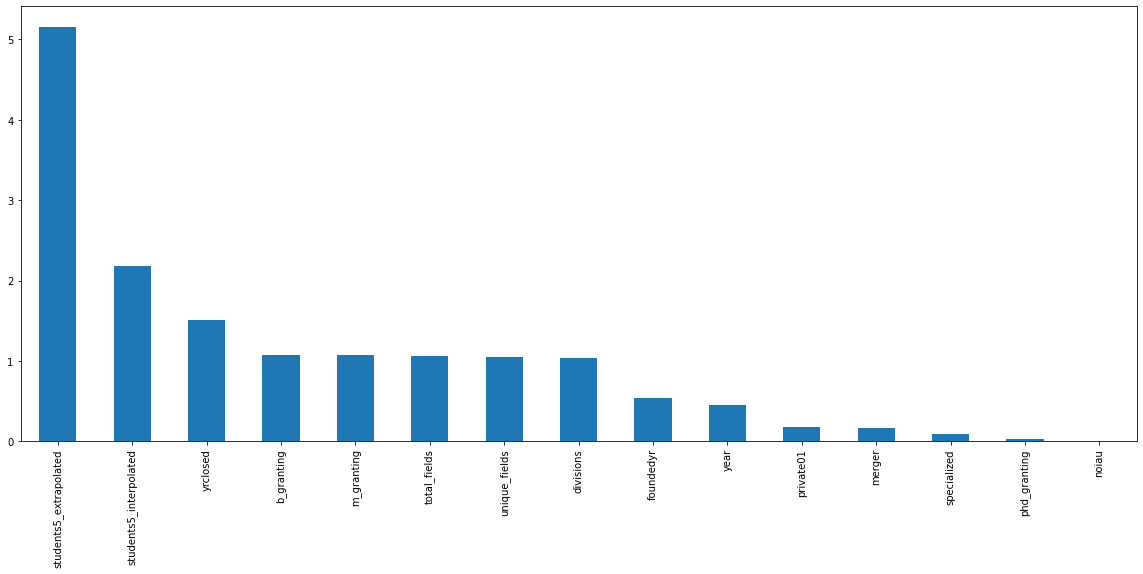

In [30]:
 mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99 )

Q. Do the training and test sets have the same data?

No. They are from the same distribution but not equal to each other.

**Q. Are the predictor variables independent of all the other predictor variables?**


To find this, we need to find if there is any correlation between the features.

Let us plot a correlation heatmap to test this.

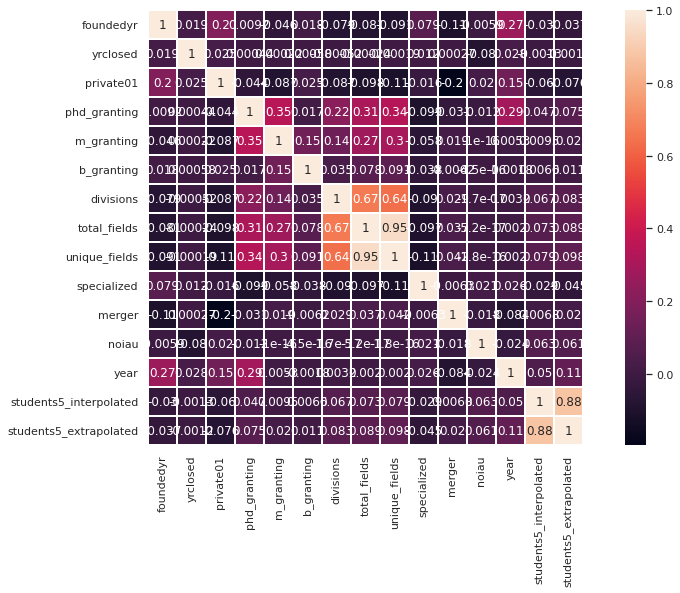

In [32]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(X.corr(), linewidths=1, annot = True, square =True , )

The above figure shows that there is multicollinearity present. Thus some predictor variables are dependent on others.

We can learn more about multicollinearity from here

Q. Which predictor variables are the most important?

For this question, we will use the SelectKBest package to find the top 4 important features.

It uses mutual information (MI) that we have already calculated above to select the K best features.

In [33]:
from sklearn.feature_selection import SelectKBest

sel_four_cols = SelectKBest(mutual_info_classif, k=4)
sel_four_cols.fit(X, y)
X.columns[sel_four_cols.get_support()]

Index(['yrclosed', 'b_granting', 'students5_interpolated',
       'students5_extrapolated'],
      dtype='object')

Q. Do the ranges of the predictor variables make sense?

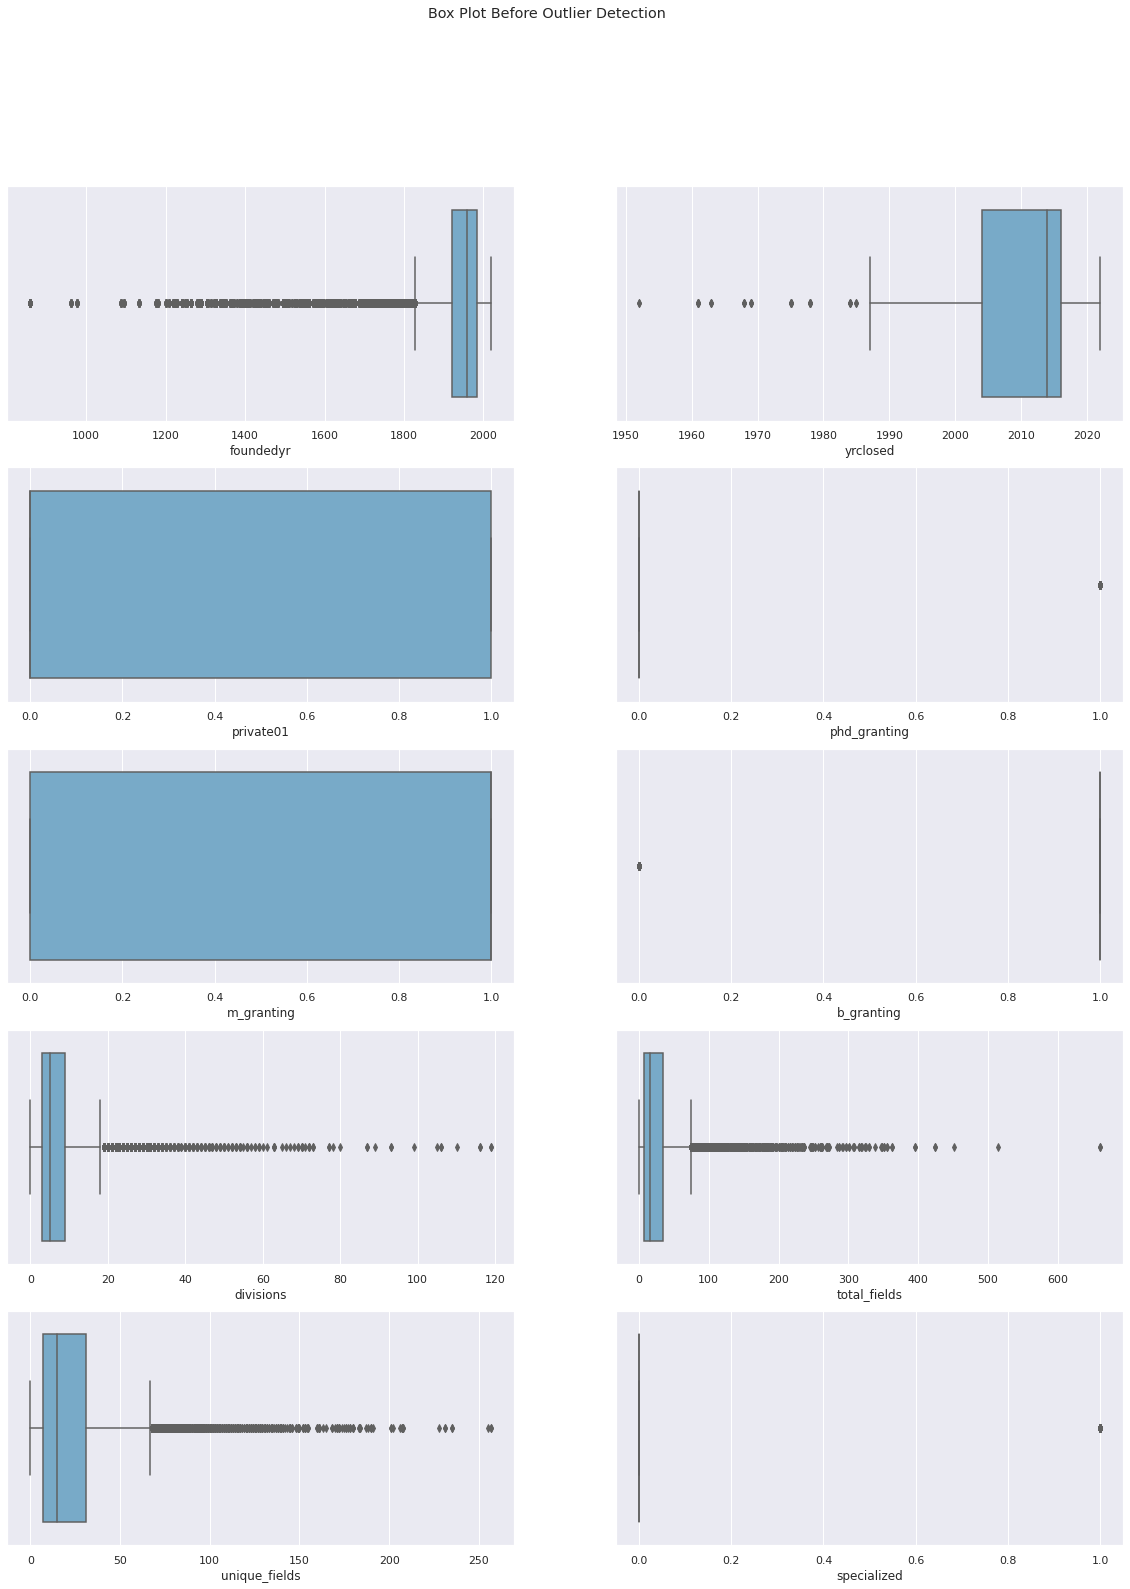

In [34]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot Before Outlier Detection')
k = 0
for i in range(0,5):
    for j in range(0,2):
        sns.boxplot(ax=axes[i,j], data=df, x=X.columns[k], palette="Blues")
        k=k+1

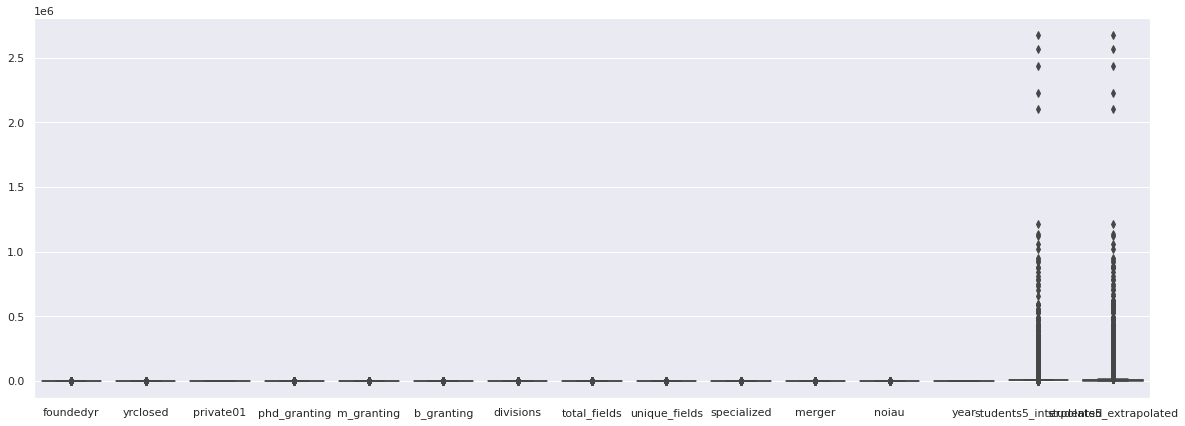

In [35]:
plt.figure(figsize=(20,7))
sns.boxplot(data=X)

Q. What are the distributions of the predictor variables?

 Let us visualize this through QQplots instead of histograms which was illustrated earlier.

<Figure size 576x360 with 0 Axes>

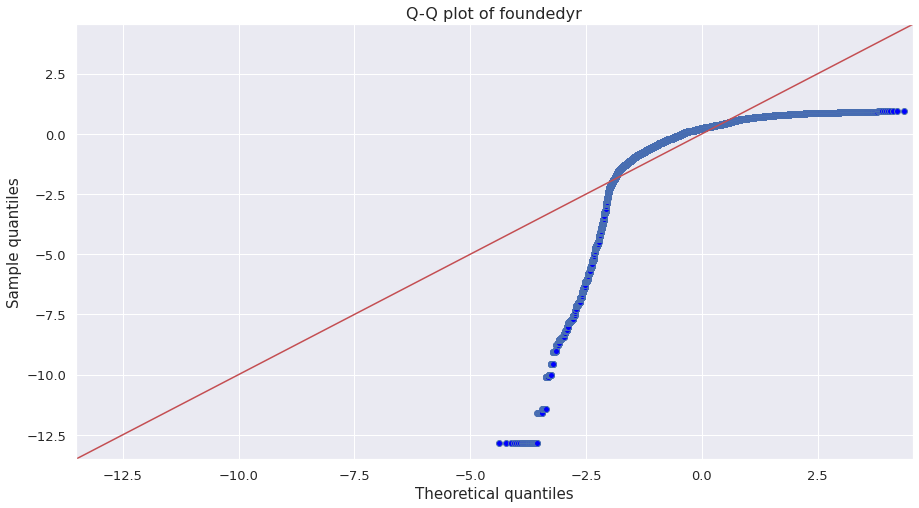

<Figure size 576x360 with 0 Axes>

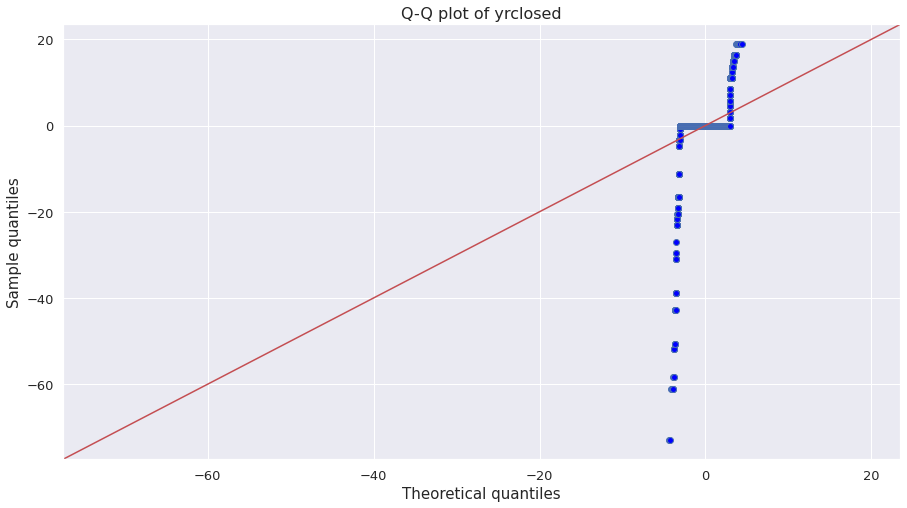

<Figure size 576x360 with 0 Axes>

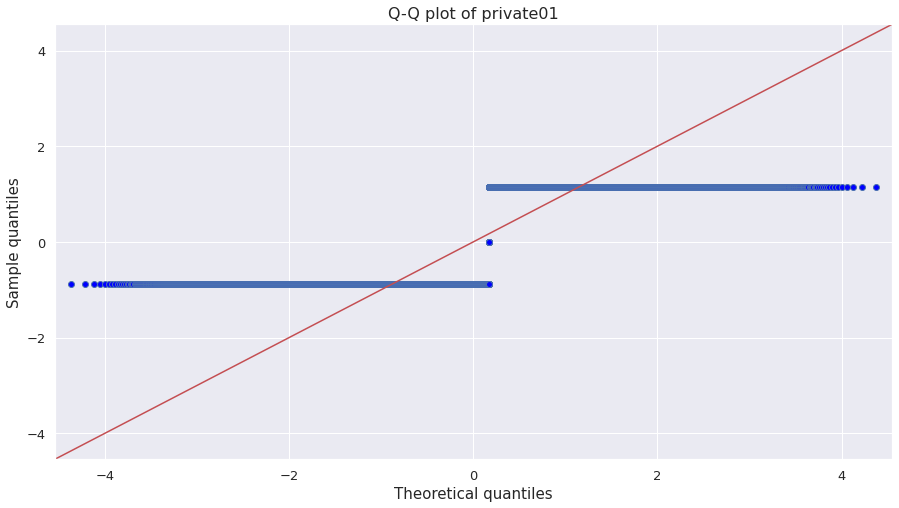

<Figure size 576x360 with 0 Axes>

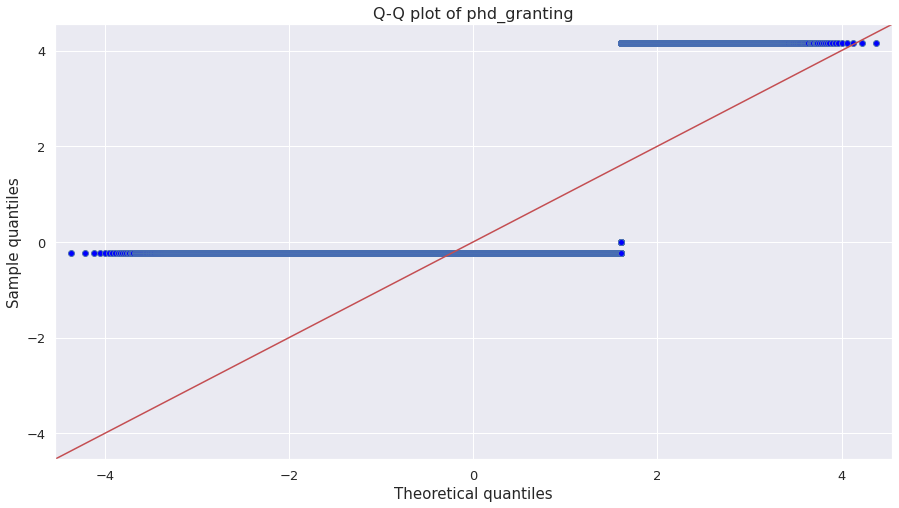

<Figure size 576x360 with 0 Axes>

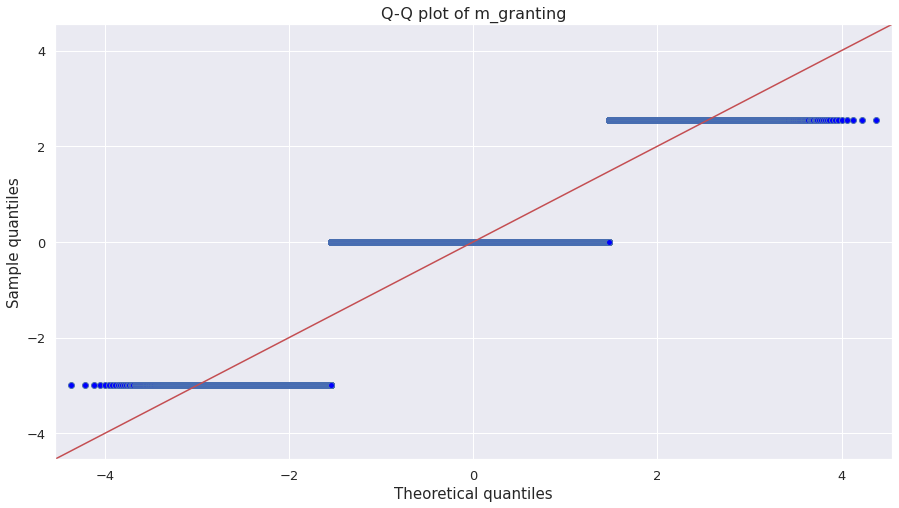

<Figure size 576x360 with 0 Axes>

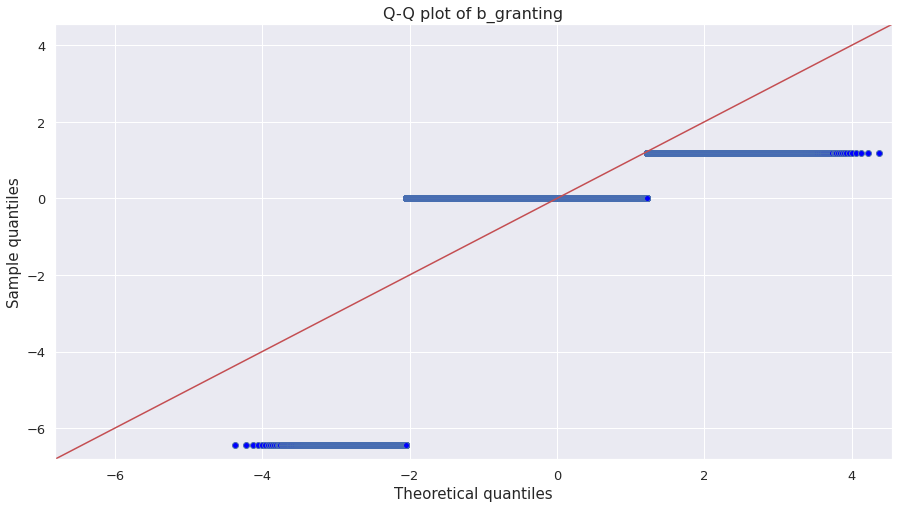

<Figure size 576x360 with 0 Axes>

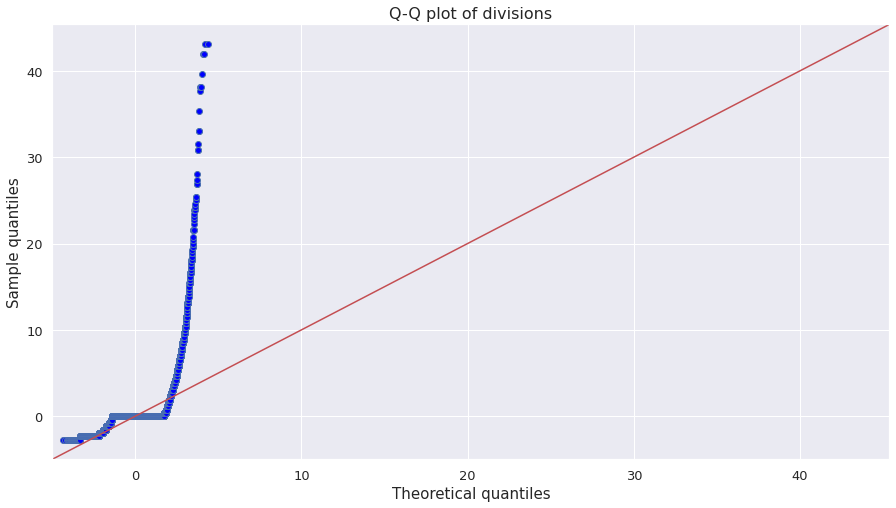

<Figure size 576x360 with 0 Axes>

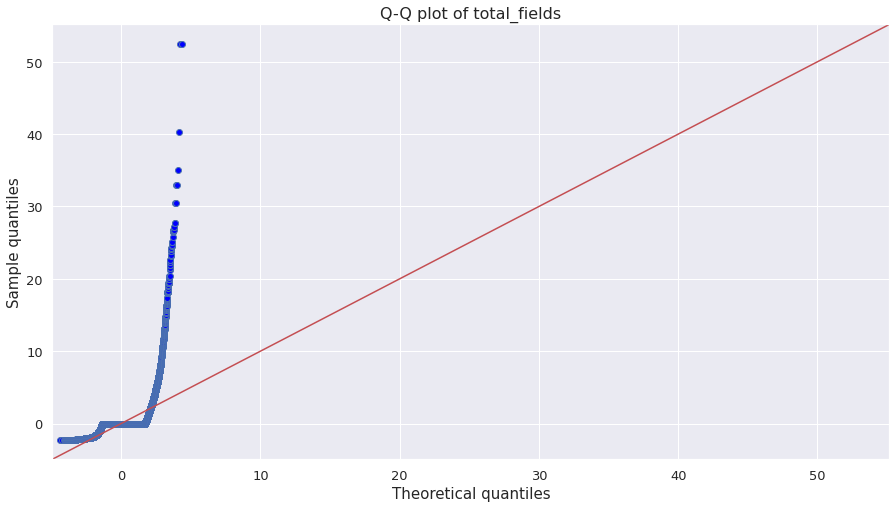

<Figure size 576x360 with 0 Axes>

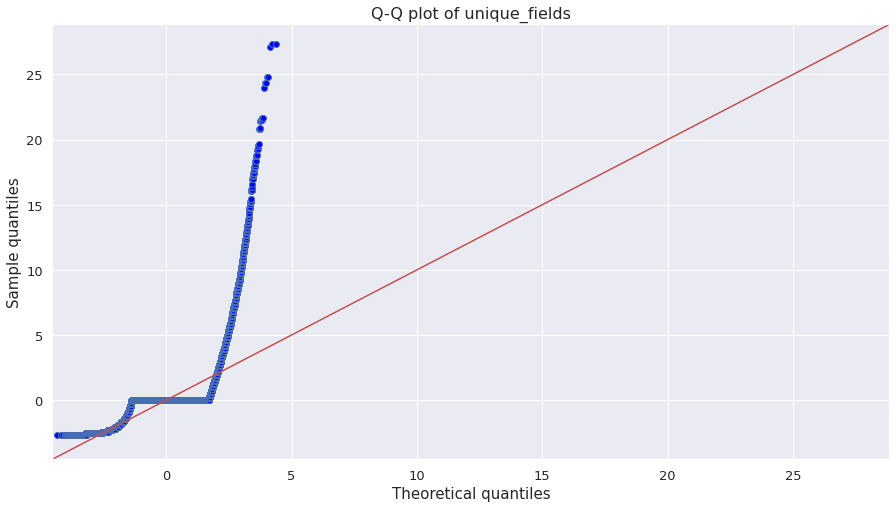

<Figure size 576x360 with 0 Axes>

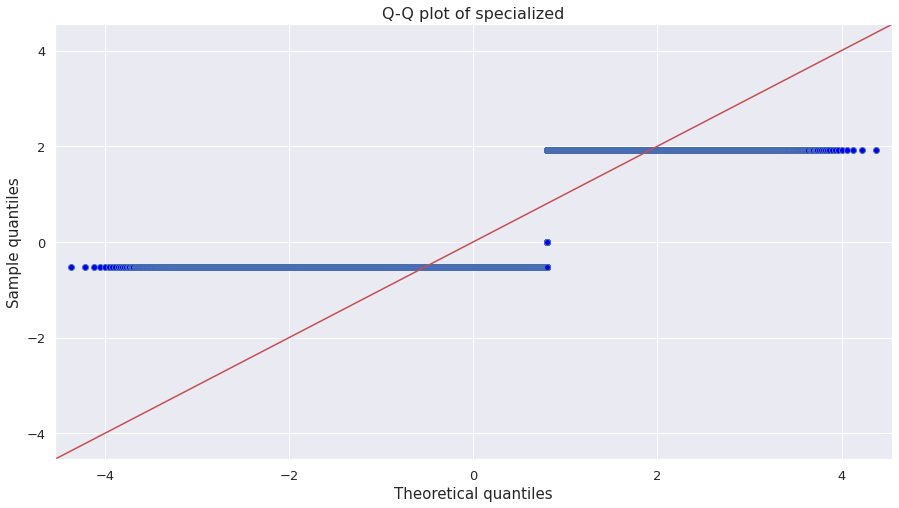

<Figure size 576x360 with 0 Axes>

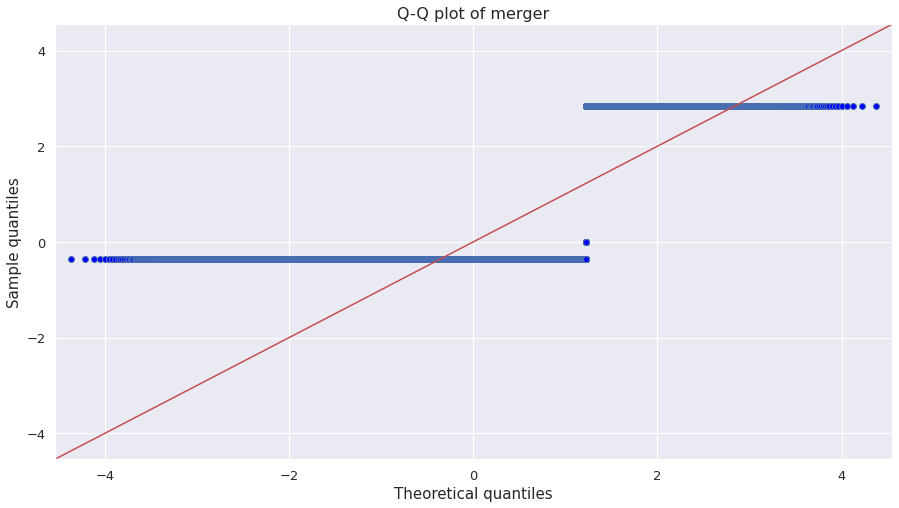

<Figure size 576x360 with 0 Axes>

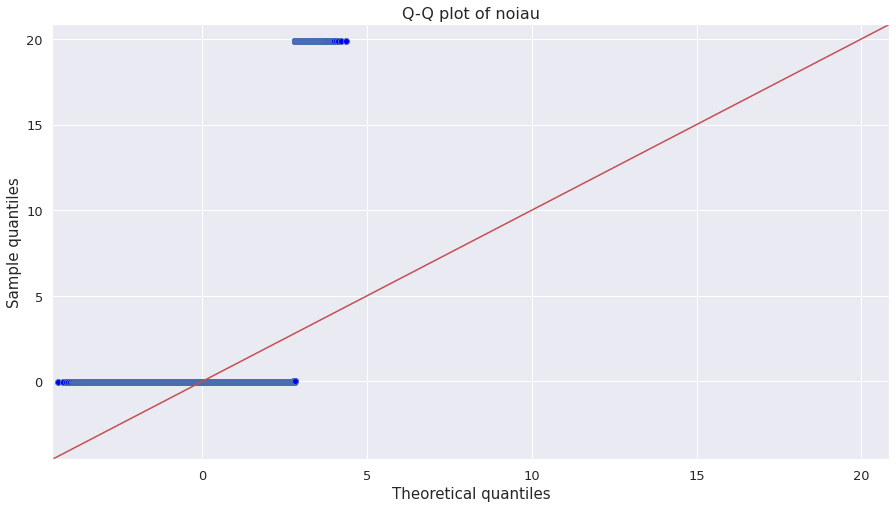

<Figure size 576x360 with 0 Axes>

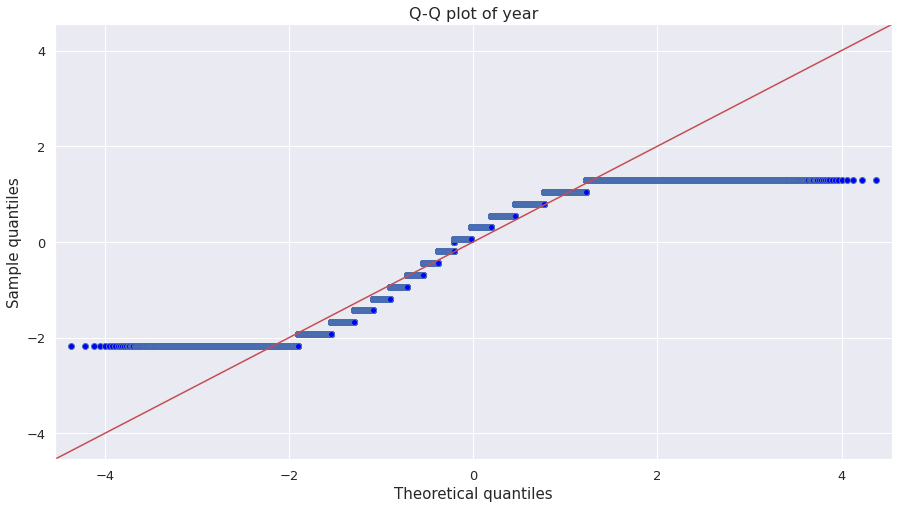

<Figure size 576x360 with 0 Axes>

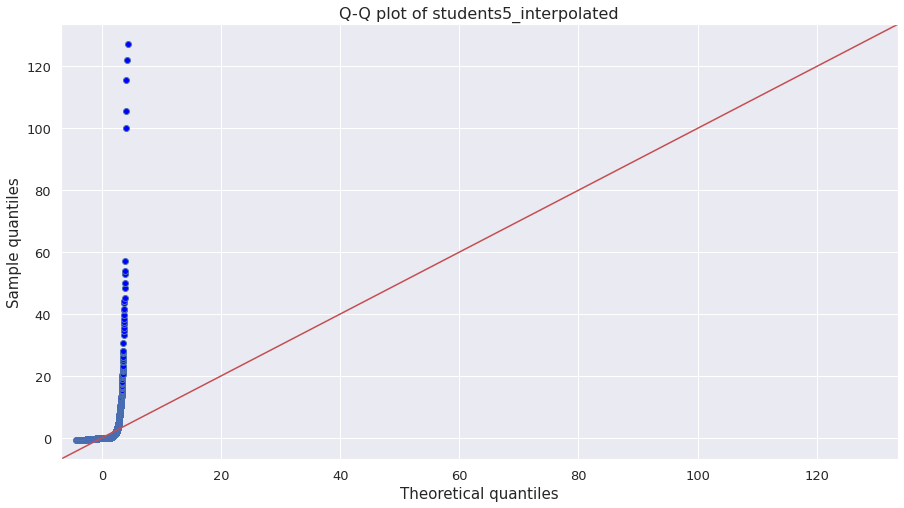

<Figure size 576x360 with 0 Axes>

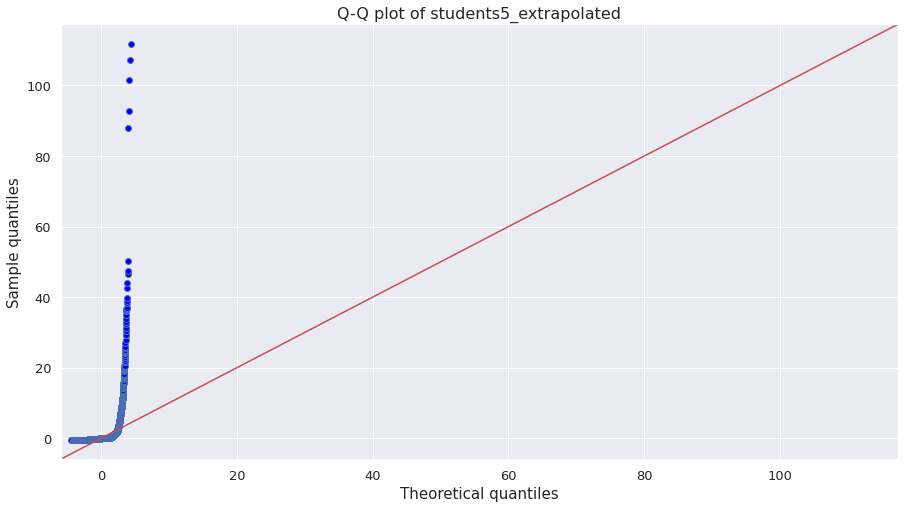

In [36]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm= X
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

Now we will scale the test and train data and fit logistic regression on it.

We have used a Standard Scaler that converts all units to Simple Normal Distribution with mean =0 and SD = 1

Logistic Regression Algorithm

In [37]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn import metrics
lr_model = lr()
lr_model.fit(X_train_scaled,y_train)
y_predicted = lr_model.predict(X_test_scaled)
print("Accuracy of Logistic Regression Model is = {0: .3f}".format(metrics.accuracy_score(y_test,y_predicted)))

Q. Remove outliers and keep outliers (does if have an effect of the final predictive model)?

To test this, let us remove the outliers, fit the logistic Regression model and compare the accuracy.

First we will write a function to calculate the IQR

In [ ]:
# Calculating the IQR
def iqr_calculation(main_df,col):
    Q1 = np.percentile(col,25,interpolation = 'midpoint')
    Q3 = np.percentile(col,75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = np.where(col>=(Q3+1.5*IQR))
    lower = np.where(col<=(Q1-1.5*IQR))
    return upper,lower

Remove the outliers and reset the Dataframe Index

In [ ]:
# Remove the outliers
def remove_outliers(main_df,upper,lower):
    main_df.drop(upper[0], inplace = True)
    main_df.drop(lower[0], inplace = True)
    print("New Shape: ", main_df.shape)
    return main_df

# Resetting the dataframe index
def reset_dataframe(main_df):
    main_df.reset_index(inplace=True)
    main_df.drop(columns=[''],inplace=True)
    return main_df

In [ ]:
import pandas as pd

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

Q. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [ ]:
df_students5_estimated= df[['students5_estimated']]
df_students5_estimated['students5_estimated_copy_1_percent'] = df[['students5_estimated']]
df_students5_estimated['students5_estimated_copy_5_percent'] = df[['students5_estimated']]
df_students5_estimated['students5_estimated_copy_10_percent'] = df[['students5_estimated']]
df_students5_estimated['Index'] = range(1, len(df_students5_estimated) + 1)
# df_MinorAxisLength['sample_num'] = df['sample_num']/1000
df_students5_estimated

Below function checks the % of missing values

In [ ]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [ ]:
print(get_percent_missing(df_students5_estimated))

Below function creates missing values

In [ ]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [ ]:
create_missing(df_students5_estimated, 0.01, 'students5_estimated_copy_1_percent')
create_missing(df_students5_estimated, 0.05, 'students5_estimated_copy_5_percent')
create_missing(df_students5_estimated, 0.1, 'students5_estimated_copy_10_percent')

In [ ]:
print(get_percent_missing(df_students5_estimated))

In [ ]:
# Store Index of NaN values in each coloumns
students5_estimated_1_idx = list(np.where(df_students5_estimated['students5_estimated_copy_1_percent'].isna())[0])
students5_estimated_5_idx = list(np.where(df_students5_estimated['students5_estimated_copy_5_percent'].isna())[0])
students5_estimated_10_idx = list(np.where(df_students5_estimated['students5_estimated_copy_10_percent'].isna())[0])

In [ ]:
print(f"Length of number_1_idx is {len(students5_estimated_1_idx)} and it contains {(len(students5_estimated_1_idx)/len(df_students5_estimated['students5_estimated_copy_1_percent']))*100} % of total data in column | Total rows: {len(df_students5_estimated['students5_estimated_copy_1_percent'])}")
print(f"Length of number_5_idx is {len(students5_estimated_5_idx)} and it contains {(len(students5_estimated_5_idx)/len(df_students5_estimated['students5_estimated_copy_5_percent']))*100} % of total data in column | Total rows: {len(df_students5_estimated['students5_estimated_copy_5_percent'])}")
print(f"Length of number_10_idx is {len(students5_estimated_10_idx)} and it contains {(len(students5_estimated_10_idx)/len(df_students5_estimated['students5_estimated_copy_10_percent']))*100} % of total data in column | Total rows: {len(df_students5_estimated['students5_estimated_copy_10_percent'])}")

### Perform KNN impute to df_number dataframe



>  KNN imputer uses the K-nearest neighbour algorithm to impute missing values. It analyses k similar points and uses their average as the value to impute.

More about this [here](https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e)



In [ ]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer
df_students5_estimated_v2 = df_students5_estimated[['Index','students5_estimated_copy_1_percent','students5_estimated_copy_5_percent','students5_estimated_copy_10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_students5_estimated_v2), columns = df_students5_estimated_v2.columns)

In [ ]:
imputed_number_df.sample(10)

In [ ]:
print(get_percent_missing(imputed_number_df))

In [ ]:
imputed_number_df['original_students5_estimated'] = df_students5_estimated['students5_estimated']
imputed_number_df['diff_1_percent'] = imputed_number_df['original_students5_estimated'] - imputed_number_df['students5_estimated_copy_1_percent']
imputed_number_df['diff_5_percent'] = imputed_number_df['original_students5_estimated'] - imputed_number_df['students5_estimated_copy_5_percent']
imputed_number_df['diff_10_percent'] = imputed_number_df['original_students5_estimated'] - imputed_number_df['students5_estimated_copy_10_percent']

In [ ]:
imputed_number_df

In [ ]:
for i in students5_estimated_10_idx:
    print(str(imputed_number_df['students5_estimated_copy_10_percent'][i])+", "+str(imputed_number_df['original_students5_estimated'][i])+", "+str(imputed_number_df['diff_10_percent'][i]))

Calculating the Error , Bias and Variance for 1% , 5% and 10% imputated data

In [ ]:
imputed_number_df['diff_1_percent'] = imputed_number_df['diff_1_percent'].astype(float)
imputed_number_df['diff_5_percent'] = imputed_number_df['diff_5_percent'].astype(float)
imputed_number_df['diff_10_percent'] = imputed_number_df['diff_10_percent'].astype(float)

print("Error for 1% Imputation =",imputed_number_df['diff_1_percent'].sum(axis=0))
print("Error for 5% Imputation =",imputed_number_df['diff_5_percent'].sum(axis=0))
print("Error for 10% Imputation =",imputed_number_df['diff_10_percent'].sum(axis=0))

In [ ]:
from math import sqrt
variance_1_percent = (imputed_number_df['diff_1_percent'] ** 2)/(len(imputed_number_df)-1)
variance_5_percent = (imputed_number_df['diff_5_percent'] ** 2)/(len(imputed_number_df)-1)
variance_10_percent = (imputed_number_df['diff_10_percent'] ** 2)/(len(imputed_number_df)-1)
print("Variance for 1 percent missing data is  ",variance_1_percent.sum(axis=0))
print("Variance for 5 percent missing data is  ",variance_5_percent.sum(axis=0))
print("Variance for 10 percent missing data is  ",variance_10_percent.sum(axis=0))


In [ ]:
acutual = imputed_number_df['original_students5_estimated].sum(axis=0) 
predicted_1_percent = imputed_number_df['students5_estimated_copy_1_percent'].sum(axis=0) 
predicted_5_percent = imputed_number_df['students5_estimated_copy_5_percent'].sum(axis=0) 
predicted_10_percent = imputed_number_df['students5_estimated_copy_10_percent'].sum(axis=0) 
N = len(students5_estimated_10_idx) - 1

bias_1_percent = (acutual - predicted_1_percent) / N
bias_5_percent = (acutual - predicted_5_percent) / N
bias_10_percent = (acutual - predicted_10_percent) / N
print("Bias for 1 percent missing data is = ",bias_1_percent)
print("Bias for 5 percent missing data is = ",bias_5_percent)
print("Bias for 10 percent missing data is = ",bias_10_percent)

### Imputation Method - Mean Imputation

> The missing values are imputed by mean of the feature.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
df_students5_estimated= df[['students5_estimated']]
df_students5_estimated['students5_estimated_copy_1_percent'] = df[['students5_estimated']]
df_students5_estimated['students5_estimated_copy_5_percent'] = df[['students5_estimated']]
df_students5_estimated['students5_estimated_copy_10_percent'] = df[['students5_estimated']]
df_students5_estimated['Index'] = range(1, len(df_students5_estimated) + 1)
# df_students5_estimated['sample_num'] = df['sample_num']/1000
df_students5_estimated

In [ ]:
print(get_percent_missing(df_students5_estimated))

In [ ]:
create_missing(df_students5_estimated, 0.01, 'students5_estimated_copy_1_percent')
create_missing(df_students5_estimated, 0.05, 'students5_estimated_copy_5_percent')
create_missing(df_students5_estimated, 0.1, 'students5_estimated_copy_10_percent')

In [ ]:
print(get_percent_missing(df_students5_estimated))

In [ ]:
# Store Index of NaN values in each coloumns
students5_estimated_1_idx = list(np.where(df_students5_estimated['students5_estimated_copy_1_percent'].isna())[0])
students5_estimated_5_idx = list(np.where(df_students5_estimated['students5_estimated_copy_5_percent'].isna())[0])
students5_estimated_10_idx = list(np.where(df_students5_estimated'students5_estimated_copy_10_percent'].isna())[0])

In [ ]:
print(f"Length of number_1_idx is {len(students5_estimated_1_idx)} and it contains {(len(students5_estimated_1_idx)/len(df_students5_estimated['students5_estimated_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_students5_estimated['students5_estimated_copy_1_percent'])}")
print(f"Length of number_5_idx is {len(students5_estimated_5_idx)} and it contains {(len(students5_estimated_5_idx)/len(df_students5_estimated['students5_estimated_copy_5_percent']))*100}% of total data in column | Total rows: {len(df_students5_estimated['students5_estimated_copy_5_percent'])}")
print(f"Length of number_10_idx is {len(students5_estimated_10_idx)} and it contains {(len(students5_estimated_10_idx)/len(df_students5_estimated['students5_estimated_copy_10_percent']))*100}% of total data in column | Total rows: {len(df_students5_estimated['students5_estimated_copy_10_percent'])}")

In [ ]:
df_students5_estimated_v2 = df_students5_estimated[['Index','students5_estimated_copy_1_percent','students5_estimated_copy_5_percent','students5_estimated_copy_10_percent']]
imputer = SimpleImputer(strategy='most_frequent')
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_students5_estimated_v2), columns = df_students5_estimated_v2.columns)

In [ ]:
imputed_number_df.sample(10)

In [ ]:
print(get_percent_missing(imputed_number_df))

In [ ]:
imputed_number_df['original_students5_estimated'] = df_students5_estimated['students5_estimated']
imputed_number_df['diff_1_percent'] = imputed_number_df['original_students5_estimated'] - imputed_number_df['students5_estimated_copy_1_percent']
imputed_number_df['diff_5_percent'] = imputed_number_df['original_students5_estimated'] - imputed_number_df['students5_estimated_copy_5_percent']
imputed_number_df['diff_10_percent'] = imputed_number_df['original_students5_estimated] - imputed_number_df['students5_estimateds_copy_10_percent']
print("Difference for 1 percent missing data .. first 3 rows only ",imputed_number_df['diff_1_percent'].head(3).sum(axis=0))
print("Difference for 5 percent missing data .. first 3 rows only ",imputed_number_df['diff_5_percent'].head(3).sum(axis=0))
print("Difference for 10 percent missing data .. first 3 rows only ",imputed_number_df['diff_10_percent'].head(3).sum(axis=0))

In [ ]:
for i in students5_estimated_10_idx:
    print(str(imputed_number_df['students5_estimated_copy_tions10_percent'][i])+", "+str(imputed_number_df['original_students5_estimated'][i])+", "+str(imputed_number_df['diff_10_percent'][i]))

In [ ]:
imputed_number_df['diff_1_percent'] = imputed_number_df['diff_1_percent'].astype(float)
imputed_number_df['diff_5_percent'] = imputed_number_df['diff_5_percent'].astype(float)
imputed_number_df['diff_10_percent'] = imputed_number_df['diff_10_percent'].astype(float)

print("Error for 1% imputation: ",imputed_number_df['diff_1_percent'].sum(axis=0))
print("Error for 5% imputation: ",imputed_number_df['diff_5_percent'].sum(axis=0))
print("Error for 10% imputation: ",imputed_number_df['diff_10_percent'].sum(axis=0))

In [ ]:
from math import sqrt
variance_1_percent = (imputed_number_df['diff_1_percent'] ** 2)/(len(imputed_number_df)-1)
variance_5_percent = (imputed_number_df['diff_5_percent'] ** 2)/(len(imputed_number_df)-1)
variance_10_percent = (imputed_number_df['diff_10_percent'] ** 2)/(len(imputed_number_df)-1)
print("Variance for 1 percent missing data is  ",variance_1_percent.sum(axis=0))
print("Variance for 5 percent missing data is  ",variance_5_percent.sum(axis=0))
print("Variance for 10 percent missing data is  ",variance_10_percent.sum(axis=0))

In [ ]:
acutual = imputed_number_df['original_students5_estimated'].sum(axis=0) 
predicted_1_percent = imputed_number_df['students5_estimated_copy_1_percent'].sum(axis=0) 
predicted_5_percent = imputed_number_df['students5_estimated_copy_5_percent'].sum(axis=0) 
predicted_10_percent = imputed_number_df['students5_estimated_copy_10_percent'].sum(axis=0) 
N = len(students5_estimated_10_idx) - 1

SimpleImputer_bias_1_percent = (acutual - predicted_1_percent) / N
SimpleImputer_bias_5_percent = (acutual - predicted_5_percent) / N
SimpleImputer_bias_10_percent = (acutual - predicted_10_percent) / N
print("Bias for 1 percent missing data is = ",SimpleImputer_bias_1_percent)
print("Bias for 5 percent missing data is = ",SimpleImputer_bias_5_percent)
print("Bias for 10 percent missing data is = ",SimpleImputer_bias_10_percent)

### Imputation Method - Iterative Imputer



> Multivariate imputer that estimates each feature from all the others.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

More on this [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)



In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
df_students5_estimated= df[['students5_estimated']]
df_students5_estimated['students5_estimated_copy_1_percent'] = df[['students5_estimated']]
df_students5_estimated['students5_estimated_copy_5_percent'] = df[['students5_estimated']]
df_students5_estimated['students5_estimated_copy_10_percent'] = df[['students5_estimated']]
df_students5_estimated['Index'] = range(1, len(df_students5_estimated) + 1)
# df_MinorAxisLength['sample_num'] = df['sample_num']/1000
df_students5_estimated

In [ ]:
print(get_percent_missing(df_students5_estimated))

In [ ]:
create_missing(df_students5_estimated, 0.01, 'students5_estimated_copy_1_percent')
create_missing(df_students5_estimated, 0.05, 'students5_estimated_copy_5_percent')
create_missing(df_students5_estimated, 0.1, 'students5_estimated_copy_10_percent')

In [ ]:
print(get_percent_missing(df_students5_estimated))

In [ ]:
students5_estimated_1_idx = list(np.where(df_students5_estimated['students5_estimated_copy_1_percent'].isna())[0])
students5_estimated_5_idx = list(np.where(df_students5_estimateds['students5_estimated_copy_5_percent'].isna())[0])
students5_estimated_10_idx = list(np.where(df_students5_estimated['students5_estimated_copy_10_percent'].isna())[0])

In [ ]:
print(f"Length of number_1_idx is {len(students5_estimated_1_idx)} and it contains {(len(students5_estimated_1_idx)/len(df_students5_estimated['students5_estimated_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_students5_estimated['students5_estimated_copy_1_percent'])}")
print(f"Length of number_5_idx is {len(students5_estimated_5_idx)} and it contains {(len(students5_estimated_5_idx)/len(df_students5_estimated['students5_estimated_copy_5_percent']))*100}% of total data in column | Total rows: {len(df_students5_estimated['students5_estimated_copy_5_percent'])}")
print(f"Length of number_10_idx is {len(students5_estimated_10_idx)} and it contains {(len(students5_estimated_10_idx)/len(df_students5_estimated['students5_estimated_copy_10_percent']))*100}% of total data in column | Total rows: {len(df_students5_estimated['students5_estimated_copy_10_percent'])}")

In [ ]:
df_students5_estimated_v2 = df_students5_estimated[['Index','students5_estimated_copy_1_percent','students5_estimated_copy_5_percent','students5_estimated_copy_10_percent']]
imputer = IterativeImputer()
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_students5_estimated_v2), columns = df_students5_estimated_v2.columns)

In [ ]:
imputed_number_df.sample(10)

In [ ]:
print(get_percent_missing(imputed_number_df))

In [ ]:
imputed_number_df['original_students5_estimated'] = df_students5_estimated['students5_estimated']
imputed_number_df['diff_1_percent'] = imputed_number_df['original_students5_estimated'] - imputed_number_df['sstudents5_estimated_copy_1_percent']
imputed_number_df['diff_5_percent'] = imputed_number_df['original_students5_estimated'] - imputed_number_df['students5_estimated_copy_5_percent']
imputed_number_df['diff_10_percent'] = imputed_number_df['original_students5_estimated'] - imputed_number_df['sstudents5_estimated_copy_10_percent']
print("Difference for 1 percent missing data .. first 3 rows only ",imputed_number_df['diff_1_percent'].head(3).sum(axis=0))
print("Difference for 5 percent missing data .. first 3 rows only ",imputed_number_df['diff_5_percent'].head(3).sum(axis=0))
print("Difference for 10 percent missing data .. first 3 rows only ",imputed_number_df['diff_10_percent'].head(3).sum(axis=0))

In [ ]:
for i in students5_estimated_10_idx:
    print(str(imputed_number_df['students5_estimated_copy_10_percent'][i])+", "+str(imputed_number_df['original_students5_estimated][i])+", "+str(imputed_number_df['diff_10_percent'][i]))

In [ ]:
imputed_number_df['diff_1_percent'] = imputed_number_df['diff_1_percent'].astype(float)
imputed_number_df['diff_5_percent'] = imputed_number_df['diff_5_percent'].astype(float)
imputed_number_df['diff_10_percent'] = imputed_number_df['diff_10_percent'].astype(float)

In [ ]:
print('Error for 1% imputed values:',imputed_number_df['diff_1_percent'].sum(axis=0))
print('Error for 5% imputed values:',imputed_number_df['diff_5_percent'].sum(axis=0))
print('Error for 10% imputed values:',imputed_number_df['diff_10_percent'].sum(axis=0))

In [ ]:
variance_1_percent = (imputed_number_df['diff_1_percent'] ** 2)/(len(imputed_number_df)-1)
variance_5_percent = (imputed_number_df['diff_5_percent'] ** 2)/(len(imputed_number_df)-1)
variance_10_percent = (imputed_number_df['diff_10_percent'] ** 2)/(len(imputed_number_df)-1)
print("Variance for 1 percent missing data is  ",variance_1_percent.sum(axis=0))
print("Variance for 5 percent missing data is  ",variance_5_percent.sum(axis=0))
print("Variance for 10 percent missing data is  ",variance_10_percent.sum(axis=0))

In [ ]:
acutual = imputed_number_df['original_students5_estimated'].sum(axis=0) 
predicted_1_percent = imputed_number_df['students5_estimated_copy_1_percent'].sum(axis=0) 
predicted_5_percent = imputed_number_df['sstudents5_estimated_copy_5_percent'].sum(axis=0) 
predicted_10_percent = imputed_number_df['students5_estimated_copy_10_percent'].sum(axis=0) 
N = len(students5_estimated_10_idx) - 1

SimpleImputer_bias_1_percent = (acutual - predicted_1_percent) / N
SimpleImputer_bias_5_percent = (acutual - predicted_5_percent) / N
SimpleImputer_bias_10_percent = (acutual - predicted_10_percent) / N
print("Bias for 1 percent missing data is = ",SimpleImputer_bias_1_percent)
print("Bias for 5 percent missing data is = ",SimpleImputer_bias_5_percent)
print("Bias for 10 percent missing data is = ",SimpleImputer_bias_10_percent)

Copyright (c) 2023 Pabbati Dinesh Siva Sai

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.